# Multiplicadores de Lagrange para igualdad

En clase se propuso el problema de 
$$ \min_{x_1,x_2} f(x_1,x_2) = x_1+x_2, $$
$$ \text{s.t.} \quad  x_1^2+x_2^2-2 = 0. $$
De forma general es
$$ \min_{\mathbf{x}} f(\mathbf{x}), $$
$$ \text{s.t.} \quad  c(\mathbf{x}) = 0.$$

Donde se busca minimizar una funcion sujeta a una condicion de igualdad.

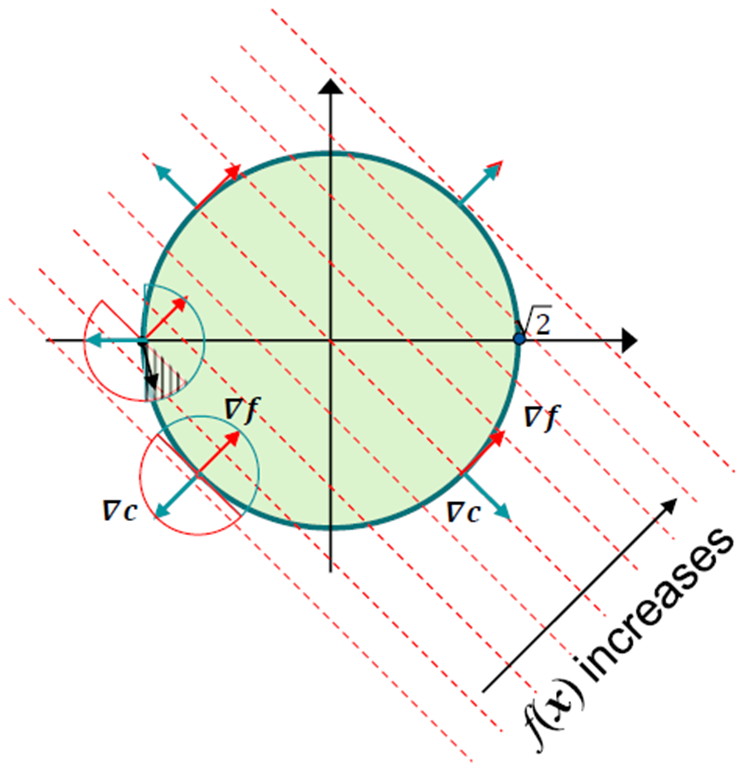

Contruimos la función Lagrangiana, $L(\mathbf{x}, \lambda) = f(\mathbf{x}) + \lambda c(\mathbf{x})$ y planteamos el siguiente problema de minimizacion sin restricciones

$$ \min_{\mathbf{x},\lambda} L(\mathbf{x}, \lambda) $$

In [ ]:
from sympy import Symbol, solve

x1 = Symbol('x1')
x2 = Symbol('x2')
lam = Symbol('l')
f = x1+x2
c = x1**2+x2**2-2
L = f+lam*c

Necesitamos determinar los puntos estacionarios, $\nabla_{\mathbf{x}} L(\mathbf{x}, \lambda) = \nabla_{\lambda} f(\mathbf{x}) +  \lambda \nabla_{\mathbf{x}} c(\mathbf{x}) = \mathbf{0}$ y $ \nabla_{\lambda} L(\mathbf{x}, \lambda) = c(\mathbf{x})  = \mathbf{0}$. Para encontrar los puntos estacionarios (puntos que satisfagan la ecuaciones igualdas a cero) usamos solve de Sympy.

In [ ]:
sol = solve([L.diff(x1),L.diff(x2),L.diff(lam)])
sol

[{l: -1/2, x1: 1, x2: 1}, {l: 1/2, x1: -1, x2: -1}]

Encontramos 2 posibles soluciones, $\mathbf{x}=[1,1]^{\top}$ con $\lambda_1=-0.5$, y $\mathbf{x}=[-1,-1]^{\top}$ con $\lambda_2=0.5$.

In [ ]:
L.subs(sol[0]), L.subs(sol[1])

(2, -2)

Donde el mínimo corresponde a $L(x_1=-1,x_2=-1,\lambda=0.5)= -2$.

También en clase se propone analizar que pasa con el signo de $\lambda$ cuando multiplicamos por -1 la restricción.

In [ ]:
c = -(x1**2+x2**2-2)
L = f+lam*c
sol = solve([L.diff(x1),L.diff(x2),L.diff(lam)])
sol

[{l: -1/2, x1: -1, x2: -1}, {l: 1/2, x1: 1, x2: 1}]

In [ ]:
L.subs(sol[0]), L.subs(sol[1])

(-2, 2)

Obtenemos la misma solución pero el signo de $\lambda$ cambia. Esto se debe a que si cambiamos el signo de la restricción, es lo mismo que escribir la función Lagrangiana como $L(\mathbf{x}, \lambda) = f(\mathbf{x}) - \lambda c(\mathbf{x})$. Lo importante es que sabemos que en el caso de las restricciones con igualdad, no importa el signo del multiplicador de Lagrange.

# Multiplicadores de Lagrange para desigualdad
En este caso la funcion a minimizar es 
$$ \min_{x_1,x_2} f(x_1,x_2) = x_1+x_2, $$
$$ \text{s.t.} \quad  x_1^2+x_2^2-2 \leq 0. $$
De forma general es
$$ \min_{\mathbf{x}} f(\mathbf{x}), $$
$$ \text{s.t.} \quad  c(\mathbf{x}) \leq 0.$$

Donde la función Lagrangiana esta dada por $L(\mathbf{x}, \lambda) = f(\mathbf{x}) + \lambda c(\mathbf{x})$.

Para este problema, analizamos que pasa con la funcion Lagrangiana para dos casos en particular: cuando estamos (1) dentro de la restriccion $c(\mathbf{x}) < 0$ y cuando estamos (2) en el borde de la restriccion $c(\mathbf{x}) = 0$.

Para el primer caso, es muy sencillo, si encontramos un punto $\mathbf{x}^*$ tal que al tratar de movernos en cualquier direccion no hacemos decrecer $f(\mathbf{x})$, entonces estamos en un minimo local. De lo contrario, seguir moviendonos.

Para el segundo caso, nos encontramos en una situación similar cuando la restricción era una igualdad. Pero con una gran diferencia, el parámetro $\lambda$ en esta ocasion no puede tomar cualquier valor posito o negativo. Analicemos el Lagrangiano 
$$ L(\mathbf{x}, \lambda) = f(\mathbf{x}) + \lambda c(\mathbf{x}) $$
Estamos buscando minimizar esta función y recordar que tambien $c(\mathbf{x})\leq 0$. Entonces tenemos una $f(\mathbf{x})$ que se le suma un termino $c(\mathbf{x})$ que es menor o igual a cero. Si $\lambda < 0 $ entonces ya no estaremos sumando un termino menor o igual a cero, sino un termino mayor o igual a cero. $\lambda$ no puede ser negativo porque cambiamos la desigualdad $c(\mathbf{x})\leq 0$ a $c(\mathbf{x})\geq 0$. Para las desigualdades $\lambda$ debe ser mayor que cero.

En el problema propuesto sabemos que el mínimo está en el borde. Entonces el problema consiste en resolver la igualdad, pero no cualquier igualdad, sólo para $c(x_1,x_2) = x_1^2+x_2^2-2$, y no para $c(x_1,x_2) = -x_1^2-x_2^2+2$. Ya que esta ultima es el borde de la desigualdad $c(x_1,x_2)\geq 0 \rightarrow -x_1^2-x_2^2+2 \geq 0$, y ese es otro problema diferente.

In [ ]:
f = x1+x2
c = x1**2+x2**2-2
L = f+lam*c
sol = solve([L.diff(x1),L.diff(x2),L.diff(lam)])
sol

[{l: -1/2, x1: 1, x2: 1}, {l: 1/2, x1: -1, x2: -1}]

Para el $ \lambda>0$ tenemos la solución $\mathbf{x}=[-1,-1]$.

Ahora, hagamos otro problema donde el mínimo este dentro de la desigualdad. Puede ser
$$ \min_{x_1,x_2} f(x_1,x_2) = (x_1-0.5)^2+(x_2-0.5)^2, $$
$$ \text{s.t.} \quad  x_1^2+x_2^2-2 \leq 0. $$

De acuerdo a lo visto en clase, podemos encontrar el mínimo usando las condiciones de primer orden para el caso de la desigualdad. Las condiciones son:

$$ \nabla_{\mathbf{x}} L(\mathbf{x},\lambda) = \mathbf{0}, \quad c(\mathbf{x}) \leq 0, \quad \lambda c(\mathbf{x}) = 0, \quad \lambda \geq 0 $$

Debido que solo podemos solucionar problemas de igualdad a cero en Simpy, vamos a emplear solo las condiciones de igualdad. Posteriormente verificamos cuales soluciones son factibles, o sea, que $c(\mathbf{x}) \leq 0$ y $\lambda \geq 0$.


In [37]:
from sympy import solve_rational_inequalities
f2 = (x1-0.5)**2+(x2-0.5)**2
L2 = f2+lam*c
sol = solve([L2.diff(x1),L2.diff(x2),lam*c])
sol

[{l: -1.50000000000000, x1: -1.00000000000000, x2: -1.00000000000000},
 {l: -0.500000000000000, x1: 1.00000000000000, x2: 1.00000000000000},
 {l: 0.0, x1: 0.500000000000000, x2: 0.500000000000000}]

Obtenemos tres soluciones, y verificamos cuales son factibles.

In [41]:
satisface_res = []
for soli in sol:       #c(x) <= 0 & lam>=0
  satisface_res.append( c.subs(soli) <=0 and soli[lam] >=0  )
print(satisface_res)

[False, False, True]


De las tres soluciones la factible es la ultima, con $\lambda = 0$, para la cual $x_1=0.5$ y $x_2=0.5$.



Ademas, cuando estamos dentro de la factibilidad, $\lambda = 0$, se desactiva la restriccion, y solo buscamos los puntos estacionarios de $f(x_1,x_2)$, así

In [ ]:
f2 = (x1-0.5)**2+(x2-0.5)**2
L2 = f2
sol = solve([L2.diff(x1),L2.diff(x2)])
sol

{x1: 0.500000000000000, x2: 0.500000000000000}